In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.22 🚀 Python-3.9.18 torch-2.2.1 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 161.2/228.3 GB disk)


In [4]:
!yolo task=classify mode=train model='/Users/fadhilahmad/Documents/apl deteksi sayur/yolov8m-cls.pt' data='/Users/fadhilahmad/Documents/apl deteksi sayur/dataset' epochs=10 imgsz=64 plots=True

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.22 🚀 Python-3.9.18 torch-2.2.1 CPU (Apple M2)
engine/trainer: task=classify, mode=train, model=/Users/fadhilahmad/Documents/apl deteksi sayur/yolov8m-cls.pt, data=/Users/fadhilahmad/Documents/apl deteksi sayur/dataset, epochs=10, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

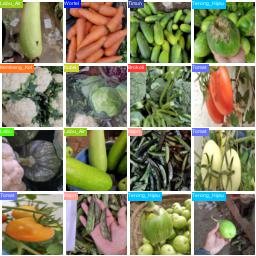

In [9]:
from IPython.display import Image

Image(filename='/Users/fadhilahmad/Documents/apl deteksi sayur/runs/classify/train/val_batch0_pred.jpg', width=400)

In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m-cls.pt')  # load an official model
model = YOLO('/Users/fadhilahmad/Documents/apl deteksi sayur/runs/classify/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5 

Ultralytics YOLOv8.1.22 🚀 Python-3.9.18 torch-2.2.1 CPU (Apple M2)
YOLOv8m-cls summary (fused): 103 layers, 15781871 parameters, 0 gradients, 41.6 GFLOPs
train: /Users/fadhilahmad/Documents/apl deteksi sayur/dataset/train... found 15000 images in 15 classes ✅ 
val: /Users/fadhilahmad/Documents/apl deteksi sayur/dataset/validation... found 3000 images in 15 classes ✅ 
test: /Users/fadhilahmad/Documents/apl deteksi sayur/dataset/test... found 3000 images in 15 classes ✅ 


val: Scanning /Users/fadhilahmad/Documents/apl deteksi sayur/dataset/validation... 3000 images, 0 corrupt: 100%|██████████| 3000/3000 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [01:03<00:00,  2.97it/s]


                   all      0.999          1
Speed: 0.0ms preprocess, 20.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


1.0

In [28]:
from ultralytics import YOLO
import numpy as np

model = YOLO('/Users/fadhilahmad/Documents/apl deteksi sayur/runs/classify/train/weights/best.pt')  # load a custom model

results = model('https://thumbs.dreamstime.com/b/vegetables-1430407.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


Found https://thumbs.dreamstime.com/b/vegetables-1430407.jpg locally at vegetables-1430407.jpg
image 1/1 /Users/fadhilahmad/Documents/apl deteksi sayur/vegetables-1430407.jpg: 64x64 Tomat 0.94, Kembang_Kol 0.03, Paprika 0.02, Pepaya 0.00, Lobak 0.00, 9.8ms
Speed: 2.7ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
{0: 'Brokoli', 1: 'Kapri', 2: 'Kembang_Kol', 3: 'Kentang', 4: 'Kubis', 5: 'Labu', 6: 'Labu_Air', 7: 'Lobak', 8: 'Paprika', 9: 'Pare', 10: 'Pepaya', 11: 'Terong_Hijau', 12: 'Timun', 13: 'Tomat', 14: 'Wortel'}
[0.0029437157791107893, 0.0001318986905971542, 0.025430072098970413, 0.00042504045995883644, 4.9730759201338515e-05, 0.00037243333645164967, 7.5510042734094895e-06, 0.0037201535888016224, 0.018004514276981354, 0.003344160271808505, 0.003884259844198823, 3.955341890105046e-05, 0.00021384129649959505, 0.9402922987937927, 0.0011407474521547556]
Tomat
